In [1]:
import numpy as np

In [37]:
a = np.random.binomial(p = 0.2, n = 2, size = 10)
b = np.random.binomial( p = 0.5, n = 1, size = 9)#size = (2,1))
a,b

(array([2, 0, 1, 1, 0, 1, 2, 0, 1, 1]), array([1, 1, 1, 0, 1, 0, 0, 1, 0]))

In [38]:
sparse_array = np.random.binomial(p = 0.2, n = 2,size = 100)

In [39]:
sparse_array

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [41]:
indeces = np.where(sparse_array != 0)

In [42]:
values = sparse_array[indeces]

In [43]:
indeces, values

((array([ 1,  7,  8, 10, 13, 16, 21, 26, 32, 33, 36, 38, 40, 42, 43, 46, 49,
         55, 58, 59, 64, 72, 76, 79, 81, 83, 84, 87, 88, 89, 90, 96, 99]),),
 array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1]))

In [48]:
## So now we have to take sparse array and shift it, and truncate to not overflow, 
## say we take correlation length tau:

In [ ]:
## sparse_array_tau = sparse_array[t:]
## sparse_array = sparse_array[:-t]

# length is reduced by t, and we get indices of new arrays:
# 1. index_array_tau = (index_array-t)[index_array >t]
# 2. indeces_ = index_array[index_array < shape - t]

In [56]:
indeces_shifted = lambda k: (indeces[0]-k)[indeces[0]>=k]
indeces_0 = lambda k: indeces[0][indeces[0] < max(indeces[0])-k]
a = indeces_0(9)
b = indeces_shifted(9)
inds = np.where(a ==b)
np.mean(a[inds]*b[inds])

In [67]:
indeces

(array([ 1,  7,  8, 10, 13, 16, 21, 26, 32, 33, 36, 38, 40, 42, 43, 46, 49,
        55, 58, 59, 64, 72, 76, 79, 81, 83, 84, 87, 88, 89, 90, 96, 99]),)

In [60]:
indeces_shifted(10)

array([ 0,  3,  6, 11, 16, 22, 23, 26, 28, 30, 32, 33, 36, 39, 45, 48, 49,
       54, 62, 66, 69, 71, 73, 74, 77, 78, 79, 80, 86, 89])

In [110]:
from matplotlib import pyplot as plt

In [113]:
arr = np.random.binomial(p = 0.2, n = 2, size = 20)
i = np.where(arr!=0)[0]
v = arr[i]

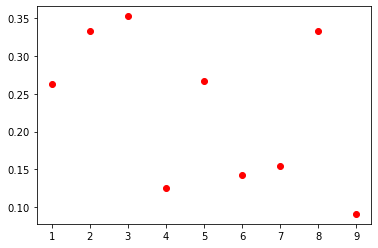

In [120]:
kk = range(1,10)
for k in kk:
    plt.plot(k, np.mean(arr[k:]*arr[:-k]),'ro')

1 ik is correct [[ True  True  True  True  True  True  True  True  True  True]]
1 i0 is correct [[ True  True  True  True  True  True  True  True  True  True]]
2 ik is correct [[ True  True  True  True  True  True  True  True  True]]
2 i0 is correct [[ True  True  True  True  True  True  True  True  True]]
3 ik is correct [[ True  True  True  True  True  True  True  True]]
3 i0 is correct [[ True  True  True  True  True  True  True  True]]
4 ik is correct [[ True  True  True  True  True  True  True  True]]
4 i0 is correct [[ True  True  True  True  True  True  True]]
5 ik is correct [[ True  True  True  True  True  True  True]]
5 i0 is correct [[ True  True  True  True  True  True]]
6 ik is correct [[ True  True  True  True  True  True  True]]
6 i0 is correct [[ True  True  True  True  True]]
7 ik is correct [[ True  True  True  True  True  True  True]]
7 i0 is correct [[ True  True  True  True  True]]
8 ik is correct [[ True  True  True  True  True  True  True]]
8 i0 is correct [[ Tru

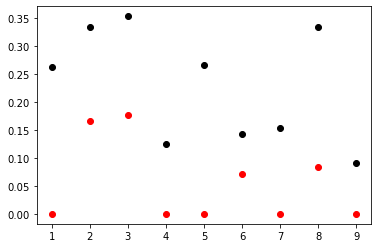

In [129]:
kk = range(1,10)
for k in kk:
    plt.plot(k, np.mean(arr[k:]*arr[:-k]),'ko')



n = 20#i[-1]
for k in kk:
    i0 = i[i < n-k]   
    ik = (i-k)[i >= k]   
    print(k,'ik is correct',(ik == np.where(arr[k:]!=0)))    
    print(k,'i0 is correct',(i0 == np.where(arr[:-k]!=0)))    
    
    v0 = v[i < n-k]
    vk = v[i >= k]
    #nk = min(i0.shape[0], ik.shape[0])
    ## Here is maybe wrong since we can judge not by shape but by the maximum index, so that we maybe throw away usefull points. 
    
    
    
    inds =  np.where(i0[:nk] == ik[:nk])
    ck = np.sum(v0[inds]*vk[inds])/(n-k)
    plt.plot(k,ck,'ro')